# Setup

In [1]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

print ('Setup complete')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Setup complete
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Processing data

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
combine = [train_data, test_data]

# Looking for some patterns

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data[['Pclass','Survived']].groupby('Pclass',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [5]:
train_data[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [6]:
train_data[['Age','Survived']].groupby('Age',as_index=False).mean().sort_values(by='Age',ascending=False)

,Age,Survived
87,80.00,1.0
86,74.00,0.0
85,71.00,0.0
84,70.50,0.0
83,70.00,0.0
...,...,...
4,0.92,1.0
3,0.83,1.0
2,0.75,1.0
1,0.67,1.0


In [7]:
train_data[['SibSp','Survived']].groupby('SibSp',as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [8]:
train_data[['Parch','Survived']].groupby('Parch',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [9]:
train_data[['Fare','Survived']].groupby('Fare',as_index=False).mean().sort_values(by=['Survived','Fare'],ascending=False)

,Fare,Survived
247,512.3292,1.0
245,262.3750,1.0
240,211.3375,1.0
239,164.8667,1.0
236,146.5208,1.0
...,...,...
5,6.4500,0.0
4,6.4375,0.0
3,6.2375,0.0
2,5.0000,0.0


In [10]:
train_data[['Embarked','Survived']].groupby('Embarked',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


## End of tabels, start of graphs:

In [11]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


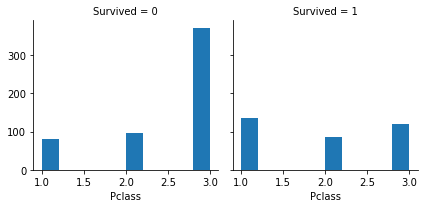

In [12]:
grid_pclass = sns.FacetGrid(train_data,col='Survived')
grid_pclass.map(plt.hist, 'Pclass')
train_data[['Pclass','Survived']].groupby('Pclass',as_index=False).mean().sort_values(by='Survived',ascending=False)

### Add Pclass to model training

,Age,Survived
87,80.00,1.0
86,74.00,0.0
85,71.00,0.0
84,70.50,0.0
83,70.00,0.0
...,...,...
4,0.92,1.0
3,0.83,1.0
2,0.75,1.0
1,0.67,1.0


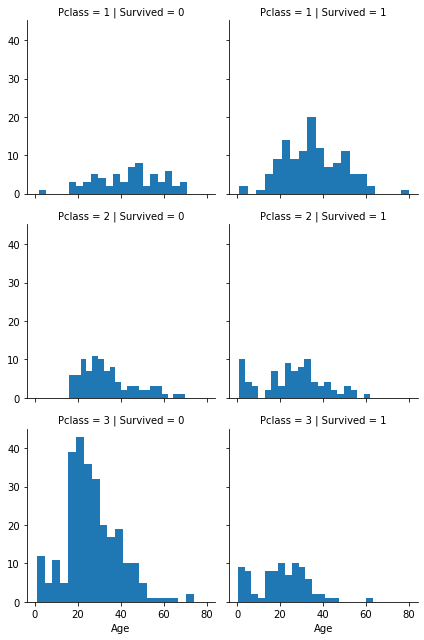

In [13]:
grid_agepclass = sns.FacetGrid(train_data, col='Survived',row='Pclass')
grid_agepclass.map(plt.hist,'Age',bins=20)
train_data[['Age','Survived']].groupby('Age',as_index=False).mean().sort_values(by='Age',ascending=False)

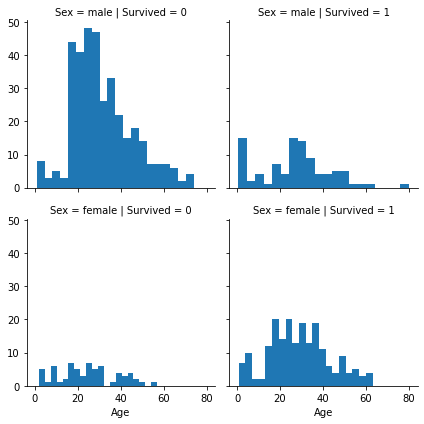

In [14]:
grid_agesex = sns.FacetGrid(train_data, col='Survived',row='Sex')
grid_agesex.map(plt.hist,'Age',bins=20)

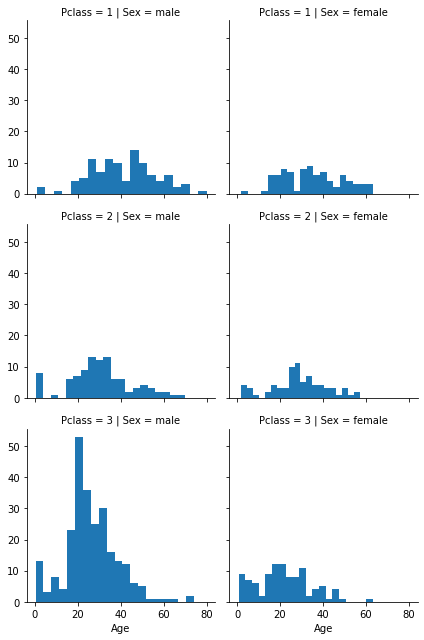

In [15]:
grid_age_pclass_sex = sns.FacetGrid(train_data,col = 'Sex',row = 'Pclass')
grid_age_pclass_sex.map(plt.hist, 'Age', bins = 20)

### Add Sex,Age to model training

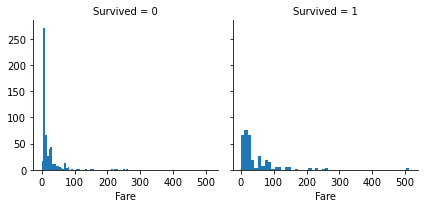

In [16]:
grid_fare_surv = sns.FacetGrid(train_data, col='Survived')
grid_fare_surv.map(plt.hist, 'Fare',bins=50) 

### Add Fare to model training

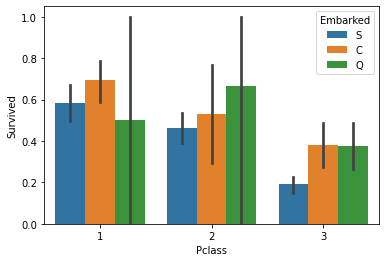

In [17]:
sns.barplot(x='Pclass',y='Survived',hue = 'Embarked',data=train_data)

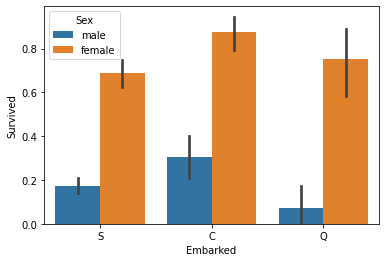

In [18]:
sns.barplot(x = 'Embarked',y = 'Survived',hue = 'Sex',data= train_data)

# Corecting data

## Deleting columns:

In [19]:
print ('Before:',train_data.shape,test_data.shape)
train_data = train_data.drop(['Ticket', 'Cabin'],axis=1)
test_data = test_data.drop(['Ticket', 'Cabin'],axis=1)
print ('After:',train_data.shape, test_data.shape)

Before: (891, 12) (418, 11)
After: (891, 10) (418, 9)


## Changing Sex type to numerical

In [20]:
combine = [train_data, test_data]
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [21]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


## Adding missing Age values by adding mediane upon Sex and Pclass

In [22]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [23]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,S


In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(1), int64(7), object(2)
memory usage: 69.7+ KB


In [25]:
train_data.Age.max()

80

## Creating age bands

In [26]:
train_data['Age_Band'] = pd.cut(train_data['Age'],5)
train_data[['Age_Band','Survived']].groupby(['Age_Band'],as_index=False).mean().sort_values(by='Age_Band',ascending=True)

,Age_Band,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [27]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 40), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 60), 'Age'] = 2
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 3
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_Band
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,71.2833,C,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,53.1000,S,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,1,0,0,8.0500,S,"(32.0, 48.0]"


In [28]:
train_data = train_data.drop(['Age_Band'], axis=1)
combine = [train_data, test_data]
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,1,0,0,8.0500,S


## Creating family size feature

In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",0,1,0,0,8.0500,S,1


In [31]:
train_data = train_data.drop(['Parch', 'SibSp'], axis=1)
test_data = test_data.drop(['Parch', 'SibSp'], axis=1)
combine = [train_data, test_data]

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",0,1,8.0500,S,1


## Mapping port of embarkation from letters to numbers

In [32]:
freq_port = train_data.Embarked.dropna().mode()[0]
freq_port

'S'

In [33]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",0,1,8.0500,0,1


## Filling Fare NA values by its median value and bending Fare

In [35]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",0,1,7.8292,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,7.0000,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,3,9.6875,2,1
3,895,3,"Wirz, Mr. Albert",0,1,8.6625,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,12.2875,0,3


In [36]:
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [37]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data = train_data.drop(['FareBand'], axis=1)
combine = [train_data, test_data]

## Creating Title feature

In [38]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

In [39]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Ms','Mlle'] ,'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [40]:
title_mapping = {'Mr':0,'Rare':1,'Master':2,'Miss':3,'Mrs':4}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    int64 
 5   Age          891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Embarked     891 non-null    int64 
 8   FamilySize   891 non-null    int64 
 9   Title        891 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 69.7+ KB


## Loking for Pearson correlation for features

In [42]:
numeric_train = train_data.select_dtypes(exclude=['object'])
correlation = numeric_train.corr()
correlation[['Survived']].sort_values(['Survived'], ascending=False)

,Survived
Survived,1.000000
Title,0.565716
Sex,0.543351
Fare,0.295875
Embarked,0.106811
FamilySize,0.016639
PassengerId,-0.005007
Age,-0.079020
Pclass,-0.338481


In [43]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Title
0,892,3,"Kelly, Mr. James",0,1,0,2,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,0,0,2,4
2,894,2,"Myles, Mr. Thomas Francis",0,3,1,2,1,0
3,895,3,"Wirz, Mr. Albert",0,1,1,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,0,3,4


# Model

In [44]:
X_train = train_data.drop(['Name','Survived','PassengerId'],axis=1)
X_test = test_data.drop(['Name','PassengerId'],axis=1)
y_train = train_data.Survived

In [45]:
from xgboost import XGBRegressor

In [46]:
model = XGBRegressor(reg_lambda= 0.01, reg_alpha= 0.001, n_estimators= 100, min_child_weight= 10, max_depth= 3, learning_rate= 0.15)

In [47]:
model.fit(X_train,y_train)
preds = model.predict(X_test)

In [48]:
out = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": preds
    })
out.head(20)

,PassengerId,Survived
0,892,0.093127
1,893,0.364378
2,894,0.117408
3,895,0.138817
4,896,0.491808
5,897,0.138817
6,898,0.755811
7,899,0.084313
8,900,0.865045
9,901,0.109352


In [49]:
output = out.round(0)
output = output.astype(int)
output.to_csv('submission.csv', index=False)